In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_simulate_rep_L6 import sim_dev_spiking, plot_dev_spiking_v2

Proportion of network driven on std: 0.10416666666666667
# driven units (Group 1) on std: 12.0
# driven units (Group 2) on std: 8.0
simulating fully-connected network
MPI will run 1 trial(s) sequentially by distributing network neurons over 6 processes.
numprocs=6
Building the NEURON model
[Done]
Starting simulation...
Trial 1: 0%
Trial 1: 10%
Trial 1: 20%
Trial 1: 30%
Trial 1: 40%
Trial 1: 50%
Trial 1: 60%
Trial 1: 70%
Trial 1: 80%
Trial 1: 90%
Trial 1: 100%
Simulation complete.


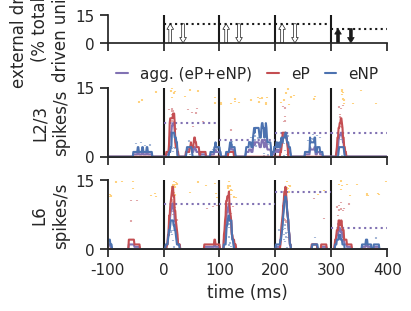

In [2]:
dev_magnitude = -1
n_trials = 1
rng = np.random.default_rng(1234)
burn_in_time = 300.0
n_procs = 6
record_vsec = False

net, drive_params = sim_dev_spiking(dev_magnitude=dev_magnitude,
                                    n_trials=n_trials,
                                    burn_in_time=burn_in_time,
                                    n_procs=n_procs,
                                    record_vsec=record_vsec,
                                    rng=rng)

rep_start_times = drive_params['rep_times']
drive_times = drive_params['drive_times']
drive_strengths = drive_params['drive_strengths']
tstop = drive_params['tstop']

fig_dev_spiking_v2 = plot_dev_spiking_v2(net,
                                         burn_in_time,
                                         rep_start_times,
                                         drive_times,
                                         drive_strengths,
                                         tstop)

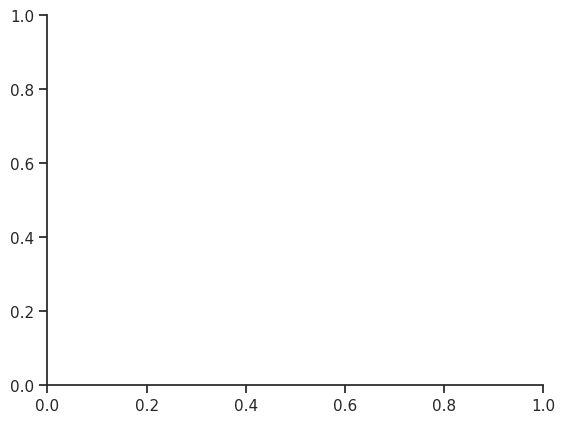

In [3]:
from hnn_core.network import pick_connection
from hnn_core.cell import _get_gaussian_connection

fig, axes = plt.subplots(1, 1)

times = net.cell_response.times
inplane_dist = net._inplane_distance

for cell_type in ['L2e_1', 'L2e_2']:
    gids = net.gid_ranges[cell_type]
    gid_max = np.max(gids)
    c_total = np.zeros((len(gids), len(times)))
    conn_idxs = pick_connection(net, target_gids=cell_type, receptor='gabaa')
    for conn_idx in conn_idxs:
        gid_pairs = net.connectivity[conn_idx]['gid_pairs'].items()
        nc_dict = net.connectivity[conn_idx]['nc_dict']
        src_type = net.connectivity[conn_idx]['src_type']
        src_gid_max = np.max(net.gid_ranges[src_type])
        for src_gid, targ_gids in gid_pairs:
            src_pos_dict_idx = np.nonzero(
                np.in1d(src_gid, net.gid_ranges[src_type])
            )[0]
            src_pos = net.pos_dict[src_type][src_pos_dict_idx]
            for targ_gid in targ_gids:
                targ_pos_dict_idx = np.nonzero(
                    np.in1d(targ_gid, net.gid_ranges[cell_type])
                )[0]
                targ_pos = net.pos_dict[cell_type][targ_pos_dict_idx]
                weight, _ = _get_gaussian_connection(src_pos, targ_pos, nc_dict,
                                                     inplane_dist)
                
                # now, convolve source spike events with conductivity response
                # function


In [4]:
conn_idxs

[28, 38, 61, 71]

In [9]:
net.connectivity[conn_idxs[3]]

L6i_2 -> L2e_2
cell counts: 32 srcs, 96 targets
connection probability: 1.0 
loc: 'soma'; receptor: 'gabaa'
weight: 0.01; delay: 1.0; lamtha: 12.0
 